In [1]:
import pandas as pd
import anndata
import matplotlib.pyplot as plt

from ALLCools.plot import *
from ALLCools.mcds import MCDS

In [2]:
#parameter part3 
mcds_paths = 'genebody_frac.mcds/genebody'
cell_meta_path = 'L1_clustering_labels.csv'
adata_path = 'adata.with_coords_final_pooled.h5ad'
cluster_col = 'L1'
mc_type = 'CGN'
coord_base = 'umap'
#clustering results
cluster_dmg_path = "L1_DMG_CGN_ppoledoocytes.hdf"

In [3]:
adata = anndata.read_h5ad(adata_path)
adata.obs
# #to match the names from 100kb with genebody sample name

use_cells = adata.obs_names

In [4]:
adata.obs

,leiden,mCGFrac,TotalRead,Group,MT.Fraction,Collection,Year,Type,umap_0,umap_1,L1,L1_proba,AnimalID
cell,,,,,,,,,,,,,
4146045001PO3NC4G4C,0,0.689,2200000,Control,NaN,2,2023,PO,NaN,-2.157124,c0,1,41460
4129944963PO2NC4M1S,0,0.684,2300000,Stressed,NaN,1,2023,PO,NaN,0.059123,c0,1,41299
4520844650PO1NC5A7S,2,0.676,2400000,Stressed,NaN,1,2022,PO,NaN,-1.432278,c0,1,45208
4146045001PO2NC3F4C,1,0.686,2500000,Control,NaN,2,2023,PO,NaN,5.192831,c0,1,41460
4520844650PO2NC3B7S,2,0.680,2600000,Stressed,NaN,1,2022,PO,NaN,-2.382400,c0,1,45208
3905345005PO1NC2I1S,1,0.623,2700000,Stressed,NaN,1,2023,PO,NaN,3.336180,c0,1,39053
4129944963PO1NC3N1S,0,0.626,2900000,Stressed,NaN,2,2023,PO,NaN,2.971206,c0,1,41299
4211144957PO1NC3K4C,2,0.674,3200000,Control,NaN,1,2023,PO,NaN,0.912201,c0,1,42111
4660644938PO2NC3A10C,1,0.680,3600000,Control,NaN,1,2023,PO,NaN,4.396003,c0,1,46606


In [5]:

cluster_dmgs = pd.read_hdf(cluster_dmg_path)
cluster_dmgs['Cluster'].values

array(['c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0',
       'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0', 'c0'], dtype=object)

In [6]:
gene_meta = pd.read_csv('../../GeneMetadata_withGeneName_corrected.csv', index_col=0)
gene_meta

,chrom,start,end,gene_name
gene_id,,,,
ENSMMUG00000023296,chr1,8230,26653,NaN
ENSMMUG00000000634,chr1,71581,83178,ZNF692
ENSMMUG00000037875,chr1,81257,91679,ZNF672
ENSMMUG00000000632,chr1,102661,117835,SH3BP5L
ENSMMUG00000064799,chr1,122995,124202,NaN
...,...,...,...,...
ENSMMUG00000052253,chrY,10095285,10099690,NaN
ENSMMUG00000057875,chrY,10102204,10117522,NaN
ENSMMUG00000063386,chrY,10327102,10371239,NaN


In [7]:
gene_name_to_gene_id = {v: k for k, v in gene_meta['gene_name'].items()}
gene_meta.index.name = 'gene_id'
#gene_name_to_gene_id
gene_meta

,chrom,start,end,gene_name
gene_id,,,,
ENSMMUG00000023296,chr1,8230,26653,NaN
ENSMMUG00000000634,chr1,71581,83178,ZNF692
ENSMMUG00000037875,chr1,81257,91679,ZNF672
ENSMMUG00000000632,chr1,102661,117835,SH3BP5L
ENSMMUG00000064799,chr1,122995,124202,NaN
...,...,...,...,...
ENSMMUG00000052253,chrY,10095285,10099690,NaN
ENSMMUG00000057875,chrY,10102204,10117522,NaN
ENSMMUG00000063386,chrY,10327102,10371239,NaN


In [8]:

gene_frac_da = MCDS.open(f'genebody_frac.mcds/',
                                 use_obs=use_cells)[f'genebody_da_frac']
gene_frac_da = gene_frac_da.sel(mc_type=mc_type).load()
gene_frac_da
# Assuming gene_frac_da is an AnnData object
# Extract the 'cell' column as a Series
cell_series = gene_frac_da['cell']
cell_series

gene_frac_da

<xarray.DataArray 'genebody_da_frac' (cell: 46, genebody: 26940)>
array([[1.0254327 , 1.3602374 , 1.0526886 , ..., 1.0907339 , 0.8672277 ,
        1.        ],
       [0.6954963 , 1.2290013 , 1.3179218 , ..., 0.6928058 , 1.2290013 ,
        1.        ],
       [0.97901124, 1.1622577 , 0.7692176 , ..., 0.8468206 , 1.0507975 ,
        0.55150944],
       ...,
       [1.1294898 , 1.1213722 , 1.0583493 , ..., 0.88464963, 0.65685475,
        0.986324  ],
       [0.952422  , 1.1273004 , 1.0255381 , ..., 0.9916174 , 0.71663487,
        0.71489674],
       [0.9683765 , 0.9462768 , 1.0192554 , ..., 0.9916444 , 0.79490244,
        1.0229511 ]], dtype=float32)
Coordinates:
  * cell               (cell) <U20 '4146045001PO3NC4G4C' ... '4123744641PO1NC...
  * genebody           (genebody) <U18 'ENSMMUG00000023296' ... 'ENSMMUG00000...
    genebody_chrom     (genebody) <U5 'chr1' 'chr1' 'chr1' ... 'chrX' 'chrX'
    genebody_cov_mean  (genebody) float64 964.3 1.281e+03 ... 261.2 69.3
    genebody_end       (genebody) int64 26653 83178 ... 151987003 152565575
    genebody_start     (genebody) int64 8230 71581 81257 ... 151983199 152564067
    mc_type            <U3 'CGN'

In [9]:
# run this cell if Jupyter Notebook environment on your local machine does not recognize the zarr engine, which is required by xarray to open the dataset. 
#!pip install zarr
# #conda install -c conda-forge zarr
# pip install --upgrade xarray
# conda update xarray

In [10]:
def get_gene_values_by_name(gene_name):
    data = gene_frac_da.sel(genebody=gene_name_to_gene_id[gene_name]).to_pandas()
    data.name = gene_name
    return data

In [11]:
def plot_cluster_and_genes(cluster, cell_meta, cluster_col, genes_data,
                           coord_base='umap', ncols=5, axes_size=3, dpi=150, hue_norm=(0, 1)):
    ncols = max(2, ncols)
    nrows = 1 + (genes_data.shape[1] - 1) // ncols + 1

    # figure
    fig = plt.figure(figsize=(ncols * axes_size, nrows * axes_size), dpi=dpi)
    gs = fig.add_gridspec(nrows=nrows, ncols=ncols)

    # cluster axes
    ax = fig.add_subplot(gs[0, 0])
    categorical_scatter(data=cell_meta,
                        ax=ax,
                        coord_base=coord_base,
                        axis_format=None,
                        hue=cluster_col,
                        palette='tab20')
    ax.set_title('All Clusters')
    ax = fig.add_subplot(gs[0, 1])
    categorical_scatter(data=cell_meta,
                        ax=ax,
                        coord_base=coord_base,
                        hue=cell_meta[cluster_col] == cluster,
                        axis_format=None,
                        palette={
                            True: 'red',
                            False: 'lightgray'
                        })
    ax.set_title('This Cluster')

    # gene axes
    for i, (gene, data) in enumerate(genes_data.items()):
        col = i % ncols
        row = i // ncols + 1
        ax = fig.add_subplot(gs[row, col])

        if ax.get_subplotspec().is_first_col() and ax.get_subplotspec().is_last_row():
            axis = 'tiny'
        else:
            axis = None

        continuous_scatter(ax=ax,
                           data=cell_meta,
                           hue=data,
                           axis_format=axis,
                           hue_norm=hue_norm,
                           coord_base=coord_base)
        ax.set_title(f'{data.name}')
    fig.suptitle(f'Cluster {cluster} Top Markers')
    return fig

In [12]:
cluster = 'c0'
genes = cluster_dmgs[cluster_dmgs['Cluster'] == cluster].sort_values(
    'logfc', ascending=False)[:1000]
#genes.to_csv('06c_TopmarkerC0_cpg_643.csv')
genes

,Cluster,Gene,pval,adjpval,logfc,Direction
0,c0,ENSMMUG00000004541,0.000315,0.668065,1.964730,hyper methylation
33,c0,ENSMMUG00000004507,0.015245,0.704439,1.885730,hyper methylation
72,c0,ENSMMUG00000064772,0.048128,0.757343,1.708590,hyper methylation
48,c0,ENSMMUG00000050871,0.023579,0.739855,1.673554,hyper methylation
31,c0,ENSMMUG00000010410,0.014225,0.701867,1.578652,hyper methylation
...,...,...,...,...,...,...
13,c0,ENSMMUG00000064414,0.005283,0.683465,-0.837526,hypo methylation
50,c0,ENSMMUG00000050700,0.024360,0.739855,-0.866516,hypo methylation
74,c0,ENSMMUG00000058428,0.049562,0.765037,-0.888083,hypo methylation
16,c0,ENSMMUG00000003201,0.006397,0.683465,-1.027198,hypo methylation


In [13]:
# Convert 'Gene' column from DataFrame to a list
genes_list = genes['Gene'].dropna().unique().tolist()  # Drop NaNs & ensure unique values

# Ensure 'genebody' exists in gene_frac_da
if 'genebody' not in gene_frac_da.coords:
    raise ValueError("genebody coordinate is missing in gene_frac_da")

# Select gene data from gene_frac_da using valid gene list
genes_data = gene_frac_da.sel(genebody=genes_list).to_pandas()
genes_data

genebody,ENSMMUG00000004541,ENSMMUG00000004507,ENSMMUG00000064772,ENSMMUG00000050871,ENSMMUG00000010410,ENSMMUG00000015709,ENSMMUG00000047902,ENSMMUG00000059043,ENSMMUG00000061107,ENSMMUG00000023647,...,ENSMMUG00000039505,ENSMMUG00000054006,ENSMMUG00000022144,ENSMMUG00000013458,ENSMMUG00000023737,ENSMMUG00000064414,ENSMMUG00000050700,ENSMMUG00000058428,ENSMMUG00000003201,ENSMMUG00000061125
cell,,,,,,,,,,,,,,,,,,,,,
4146045001PO3NC4G4C,1.000000,0.102057,0.254270,1.000000,0.041591,0.373706,0.123114,1.000000,0.081219,0.081219,...,0.560029,0.178293,0.867228,0.443080,0.334101,1.185130,0.443080,1.190371,1.000000,0.502744
4129944963PO2NC4M1S,1.000000,1.000000,0.684374,1.000000,0.251464,1.000000,1.000000,1.000000,0.153039,0.147417,...,1.042589,0.549626,1.038865,1.000000,0.164661,0.980409,0.520189,0.194148,1.000000,0.292795
4520844650PO1NC5A7S,1.000000,1.000000,1.000000,1.000000,0.551509,0.367700,1.000000,0.153268,1.000000,0.450489,...,1.000000,1.000000,0.631820,0.078177,0.096601,0.714750,0.466413,0.140864,0.099979,0.380748
4146045001PO2NC3F4C,0.130050,1.000000,0.296751,0.091297,0.678442,0.095426,1.000000,1.000000,0.231602,0.040014,...,1.040476,0.208693,1.093260,1.000000,0.894133,1.000000,0.267020,1.307601,1.000000,0.351559
4520844650PO2NC3B7S,1.000000,0.080365,0.418196,0.103295,0.558914,1.000000,1.000000,1.000000,1.000000,0.879346,...,0.522508,0.240573,0.817853,1.000000,0.291995,0.529207,0.393118,0.514184,0.637444,0.387842
3905345005PO1NC2I1S,1.000000,1.396981,0.122341,1.000000,0.138555,0.343285,1.000000,1.000000,1.000000,0.249983,...,0.422034,0.181974,1.000000,1.000000,0.159723,1.139624,0.294874,0.113144,0.080140,0.343285
4129944963PO1NC3N1S,1.000000,1.000000,1.000000,1.000000,0.110510,0.398538,1.000000,1.000000,1.000000,1.000000,...,0.487965,0.263456,1.188362,0.498476,0.316190,0.284472,0.073657,1.000000,0.210936,0.060902
4211144957PO1NC3K4C,0.108785,0.204891,0.151392,1.000000,0.176346,0.088118,1.000000,0.071759,1.000000,0.142115,...,0.370908,0.142115,0.254827,1.000000,0.133909,1.062223,1.132667,1.000000,0.755600,0.818279
4660644938PO2NC3A10C,0.324184,0.157458,0.166578,1.000000,0.044916,0.255197,0.057936,0.094433,0.155760,1.000000,...,0.108528,0.285583,1.230936,0.705749,0.079720,1.246332,0.716899,0.179771,0.417523,0.609887


In [14]:

#genes_data.columns = genes_data.columns.map(gene_meta['gene_name'])
#genes_data.columns
# Save the column names as a DataFrame and then to a CSV file
#column_names_df = pd.DataFrame(genes_data.columns)

# Save the column names to CSV
#column_names_df.to_csv("06c_TopmarkerC2_cpg__genenames.168.csv", index=False)
#column_names_df

In [15]:
# importing gene list with gene names with lifted regions from hg38 for "nan"
genewlift = pd.read_csv("mCG_genenames_coords_withlifted.csv", header=None)
genewlift.columns = ["gene_id", "chr", "start", "end", "gene_name"]
genewlift

merged_df = pd.merge(genewlift, genes, left_on='gene_id', right_on='Gene')
merged_df.index = merged_df["gene_id"]
merged_df

gene = merged_df.iloc[:, 4]
#gene = pd.DataFrame(gene)
gene

gene_id
ENSMMUG00000053525       MCL1
ENSMMUG00000054615        NaN
ENSMMUG00000053737     BARHL2
ENSMMUG00000063102    CAMK2N1
ENSMMUG00000016814       THBD
                       ...   
ENSMMUG00000030511      FRAT1
ENSMMUG00000054006     NKX1-2
ENSMMUG00000065350       UTF1
ENSMMUG00000003201    MID1IP1
ENSMMUG00000054007       ZIC3
Name: gene_name, Length: 75, dtype: object

In [16]:
print(genes_data.columns.intersection(gene.index))



Index(['ENSMMUG00000004541', 'ENSMMUG00000004507', 'ENSMMUG00000064772',
       'ENSMMUG00000050871', 'ENSMMUG00000010410', 'ENSMMUG00000015709',
       'ENSMMUG00000047902', 'ENSMMUG00000059043', 'ENSMMUG00000061107',
       'ENSMMUG00000023647', 'ENSMMUG00000050187', 'ENSMMUG00000060879',
       'ENSMMUG00000011516', 'ENSMMUG00000053737', 'ENSMMUG00000020837',
       'ENSMMUG00000061648', 'ENSMMUG00000005046', 'ENSMMUG00000052653',
       'ENSMMUG00000011042', 'ENSMMUG00000030511', 'ENSMMUG00000029445',
       'ENSMMUG00000023501', 'ENSMMUG00000065350', 'ENSMMUG00000057878',
       'ENSMMUG00000056576', 'ENSMMUG00000014601', 'ENSMMUG00000016814',
       'ENSMMUG00000022050', 'ENSMMUG00000065344', 'ENSMMUG00000047932',
       'ENSMMUG00000057888', 'ENSMMUG00000004882', 'ENSMMUG00000050277',
       'ENSMMUG00000061750', 'ENSMMUG00000000157', 'ENSMMUG00000044556',
       'ENSMMUG00000061046', 'ENSMMUG00000063102', 'ENSMMUG00000001570',
       'ENSMMUG00000061944', 'ENSMMUG00000064376', 

In [17]:
# Convert the gene series to a dictionary
gene_dict = gene.to_dict()

# Replace gene IDs with gene names when available; otherwise, keep the original gene ID
genes_data.columns = [gene_dict.get(gid, gid) if pd.notna(gene_dict.get(gid, None)) else gid 
                        for gid in genes_data.columns]
genes_data

,HOXC12,GSX1,FEV,SOX18,FOXA2,WNT1,SSNA1,FOXQ1,ENSMMUG00000061107,SKIDA1,...,AMN,NKX1-2,CYP27B1,HOXA7,VGLL2,ENSMMUG00000064414,APOLD1,SOCS3,MID1IP1,"MT-ND5, MT-ND6, MT-TE, MT-CYB"
cell,,,,,,,,,,,,,,,,,,,,,
4146045001PO3NC4G4C,1.000000,0.102057,0.254270,1.000000,0.041591,0.373706,0.123114,1.000000,0.081219,0.081219,...,0.560029,0.178293,0.867228,0.443080,0.334101,1.185130,0.443080,1.190371,1.000000,0.502744
4129944963PO2NC4M1S,1.000000,1.000000,0.684374,1.000000,0.251464,1.000000,1.000000,1.000000,0.153039,0.147417,...,1.042589,0.549626,1.038865,1.000000,0.164661,0.980409,0.520189,0.194148,1.000000,0.292795
4520844650PO1NC5A7S,1.000000,1.000000,1.000000,1.000000,0.551509,0.367700,1.000000,0.153268,1.000000,0.450489,...,1.000000,1.000000,0.631820,0.078177,0.096601,0.714750,0.466413,0.140864,0.099979,0.380748
4146045001PO2NC3F4C,0.130050,1.000000,0.296751,0.091297,0.678442,0.095426,1.000000,1.000000,0.231602,0.040014,...,1.040476,0.208693,1.093260,1.000000,0.894133,1.000000,0.267020,1.307601,1.000000,0.351559
4520844650PO2NC3B7S,1.000000,0.080365,0.418196,0.103295,0.558914,1.000000,1.000000,1.000000,1.000000,0.879346,...,0.522508,0.240573,0.817853,1.000000,0.291995,0.529207,0.393118,0.514184,0.637444,0.387842
3905345005PO1NC2I1S,1.000000,1.396981,0.122341,1.000000,0.138555,0.343285,1.000000,1.000000,1.000000,0.249983,...,0.422034,0.181974,1.000000,1.000000,0.159723,1.139624,0.294874,0.113144,0.080140,0.343285
4129944963PO1NC3N1S,1.000000,1.000000,1.000000,1.000000,0.110510,0.398538,1.000000,1.000000,1.000000,1.000000,...,0.487965,0.263456,1.188362,0.498476,0.316190,0.284472,0.073657,1.000000,0.210936,0.060902
4211144957PO1NC3K4C,0.108785,0.204891,0.151392,1.000000,0.176346,0.088118,1.000000,0.071759,1.000000,0.142115,...,0.370908,0.142115,0.254827,1.000000,0.133909,1.062223,1.132667,1.000000,0.755600,0.818279
4660644938PO2NC3A10C,0.324184,0.157458,0.166578,1.000000,0.044916,0.255197,0.057936,0.094433,0.155760,1.000000,...,0.108528,0.285583,1.230936,0.705749,0.079720,1.246332,0.716899,0.179771,0.417523,0.609887


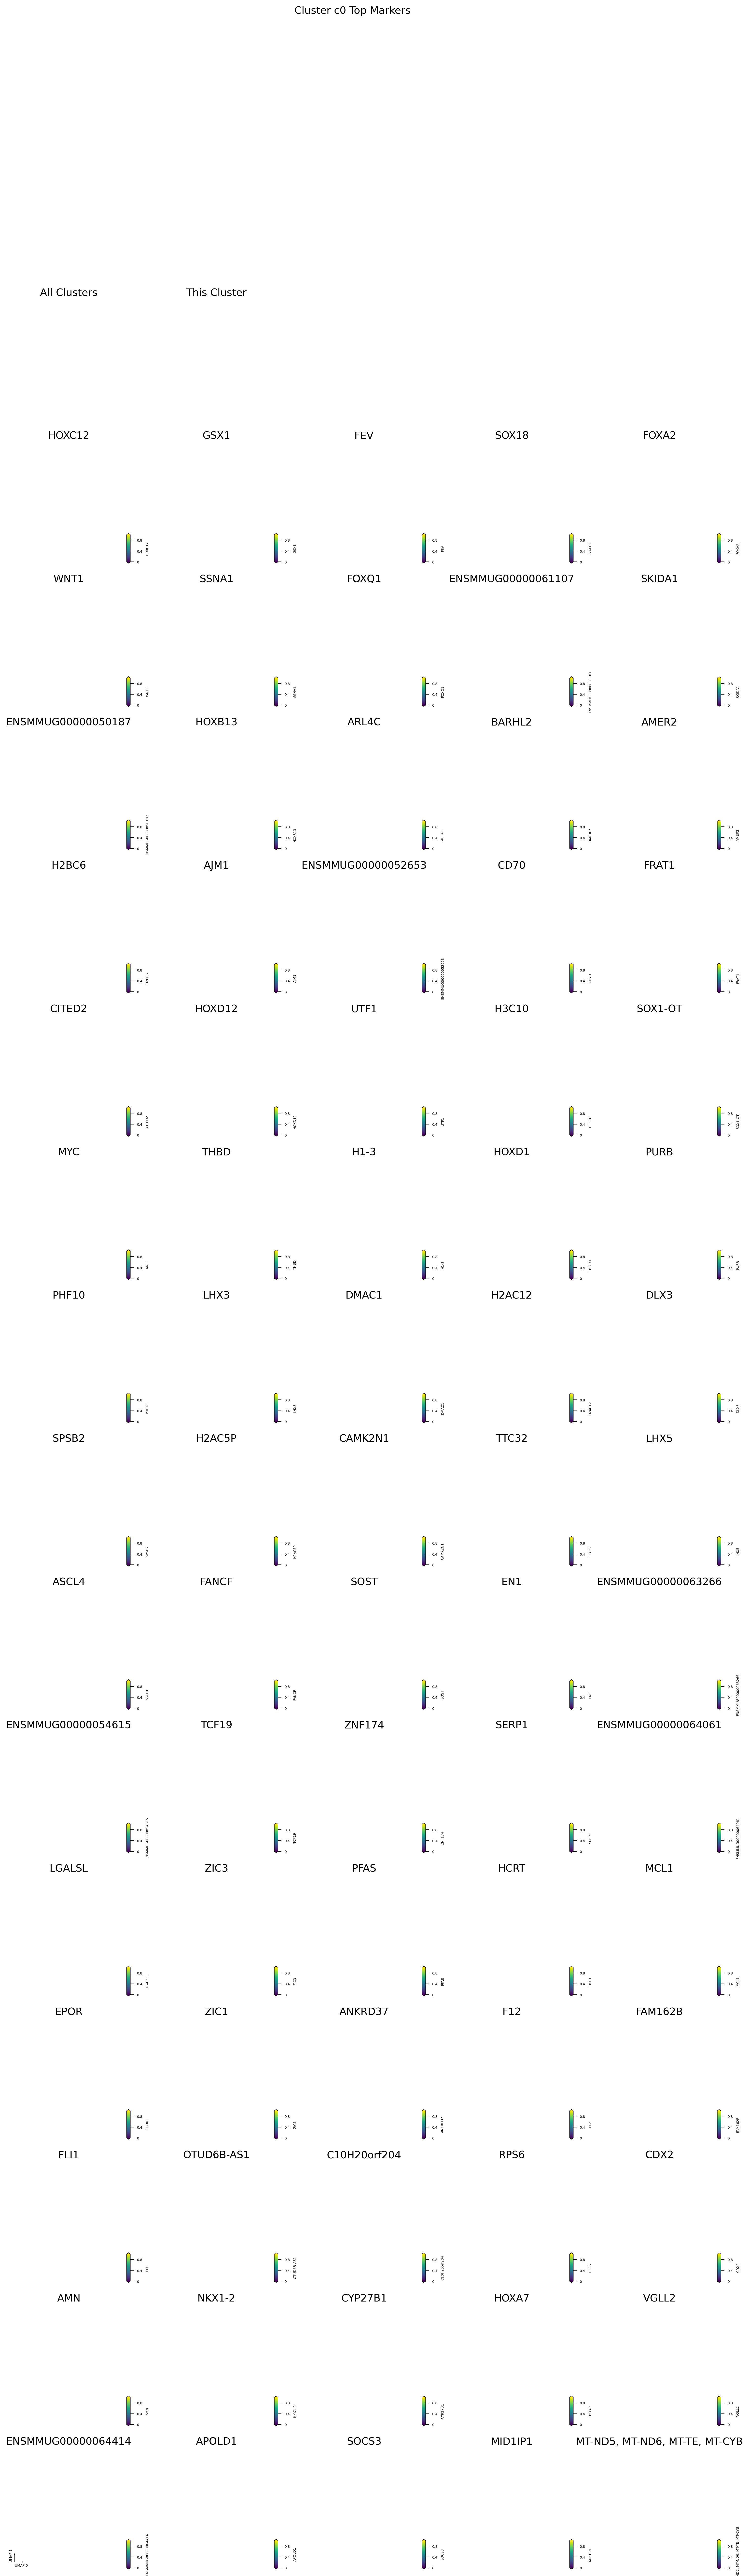

In [18]:
fig = plot_cluster_and_genes(cluster=cluster,
                             cell_meta=adata.obs,
                             cluster_col=cluster_col,
                             genes_data=genes_data,

                             coord_base='umap',
                             ncols=5,
                             axes_size=3,
                             dpi=250,
                             hue_norm=(0, 1))

In [19]:
fig.savefig(f'{cluster}.CGN_C0_TopMarker.png', bbox_inches='tight')

In [20]:
cell_meta = adata.obs
cell_meta

,leiden,mCGFrac,TotalRead,Group,MT.Fraction,Collection,Year,Type,umap_0,umap_1,L1,L1_proba,AnimalID
cell,,,,,,,,,,,,,
4146045001PO3NC4G4C,0,0.689,2200000,Control,NaN,2,2023,PO,NaN,-2.157124,c0,1,41460
4129944963PO2NC4M1S,0,0.684,2300000,Stressed,NaN,1,2023,PO,NaN,0.059123,c0,1,41299
4520844650PO1NC5A7S,2,0.676,2400000,Stressed,NaN,1,2022,PO,NaN,-1.432278,c0,1,45208
4146045001PO2NC3F4C,1,0.686,2500000,Control,NaN,2,2023,PO,NaN,5.192831,c0,1,41460
4520844650PO2NC3B7S,2,0.680,2600000,Stressed,NaN,1,2022,PO,NaN,-2.382400,c0,1,45208
3905345005PO1NC2I1S,1,0.623,2700000,Stressed,NaN,1,2023,PO,NaN,3.336180,c0,1,39053
4129944963PO1NC3N1S,0,0.626,2900000,Stressed,NaN,2,2023,PO,NaN,2.971206,c0,1,41299
4211144957PO1NC3K4C,2,0.674,3200000,Control,NaN,1,2023,PO,NaN,0.912201,c0,1,42111
4660644938PO2NC3A10C,1,0.680,3600000,Control,NaN,1,2023,PO,NaN,4.396003,c0,1,46606


In [21]:
gene_data = genes_data.transpose()
gene_data

cell,4146045001PO3NC4G4C,4129944963PO2NC4M1S,4520844650PO1NC5A7S,4146045001PO2NC3F4C,4520844650PO2NC3B7S,3905345005PO1NC2I1S,4129944963PO1NC3N1S,4211144957PO1NC3K4C,4660644938PO2NC3A10C,4139144923PO4NC4K3C,...,4566944700PO2NC5P8C,4146044643PO1NC5O3C,4456444991PO1NC3H6C,4139144923PO2NC3I3C,4146044643PO2NC5P3C,4139144650PO3NC3E3C,4566944700PO3NC4A9C,4302844664PO2NC5K5C,4139144923PO1NC3H3C,4123744641PO1NC4N2S
HOXC12,1.000000,1.000000,1.000000,0.130050,1.000000,1.000000,1.000000,0.108785,0.324184,0.380352,...,0.079709,0.123240,0.144362,0.310719,0.089593,0.069927,0.060399,0.066317,0.069622,0.116580
GSX1,0.102057,1.000000,1.000000,1.000000,0.080365,1.396981,1.000000,0.204891,0.157458,0.450074,...,1.000000,0.113772,0.033479,0.033772,0.094151,0.068475,0.047751,0.053392,0.085383,0.058550
FEV,0.254270,0.684374,1.000000,0.296751,0.418196,0.122341,1.000000,0.151392,0.166578,0.210046,...,0.050376,0.035484,0.037877,0.034083,0.083846,0.037308,0.029164,0.036422,0.037932,0.037696
SOX18,1.000000,1.000000,1.000000,0.091297,0.103295,1.000000,1.000000,1.000000,1.000000,0.092809,...,1.000000,0.066881,0.094828,0.093818,0.261112,0.040846,0.074203,0.027659,0.063787,0.039574
FOXA2,0.041591,0.251464,0.551509,0.678442,0.558914,0.138555,0.110510,0.176346,0.044916,0.132439,...,0.071579,0.048952,0.071239,0.066170,0.058857,0.037308,0.041080,0.030394,0.036108,0.025078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMMUG00000064414,1.185130,0.980409,0.714750,1.000000,0.529207,1.139624,0.284472,1.062223,1.246332,0.937680,...,0.975426,1.152003,1.171793,1.025592,0.938398,0.974050,1.069579,1.067006,1.025265,1.092601
APOLD1,0.443080,0.520189,0.466413,0.267020,0.393118,0.294874,0.073657,1.132667,0.716899,0.980112,...,0.551779,0.190633,0.216381,0.436460,0.153896,0.327930,0.660237,0.654444,0.294284,0.476739
SOCS3,1.190371,0.194148,0.140864,1.307601,0.514184,0.113144,1.000000,1.000000,0.179771,1.000000,...,0.225452,0.436682,0.142997,0.080918,0.518355,0.604295,0.292524,0.307667,0.237821,0.249239
MID1IP1,1.000000,1.000000,0.099979,1.000000,0.637444,0.080140,0.210936,0.755600,0.417523,0.100399,...,0.742632,0.379261,0.923728,0.646252,0.578263,0.387197,0.459251,0.479445,0.382684,0.607028


In [22]:
# Sort metadata
metadata_sorted = cell_meta.sort_values(by=['L1', 'Group', 'Type'])

# Reorder gene_data columns to match the sorted metadata
gene_data_sorted = gene_data[metadata_sorted.index]

gene_data_sorted = gene_data_sorted[0:100]
#gene_data_sorted.to_csv("mcg_dmg_geneindmatrix.csv")
genelist = gene_data_sorted[gene_data_sorted.index.notna()]
genelist.index

Index(['HOXC12', 'GSX1', 'FEV', 'SOX18', 'FOXA2', 'WNT1', 'SSNA1', 'FOXQ1',
       'ENSMMUG00000061107', 'SKIDA1', 'ENSMMUG00000050187', 'HOXB13', 'ARL4C',
       'BARHL2', 'AMER2', 'H2BC6', 'AJM1', 'ENSMMUG00000052653', 'CD70',
       'FRAT1', 'CITED2', 'HOXD12', 'UTF1', 'H3C10', 'SOX1-OT', 'MYC', 'THBD',
       'H1-3', 'HOXD1', 'PURB', 'PHF10', 'LHX3', 'DMAC1', 'H2AC12', 'DLX3',
       'SPSB2', 'H2AC5P', 'CAMK2N1', 'TTC32', 'LHX5', 'ASCL4', 'FANCF', 'SOST',
       'EN1', 'ENSMMUG00000063266', 'ENSMMUG00000054615', 'TCF19', 'ZNF174',
       'SERP1', 'ENSMMUG00000064061', 'LGALSL', 'ZIC3', 'PFAS', 'HCRT', 'MCL1',
       'EPOR', 'ZIC1', 'ANKRD37', 'F12', 'FAM162B', 'FLI1', 'OTUD6B-AS1',
       'C10H20orf204', 'RPS6', 'CDX2', 'AMN', 'NKX1-2', 'CYP27B1', 'HOXA7',
       'VGLL2', 'ENSMMUG00000064414', 'APOLD1', 'SOCS3', 'MID1IP1',
       'MT-ND5, MT-ND6, MT-TE, MT-CYB'],
      dtype='object')

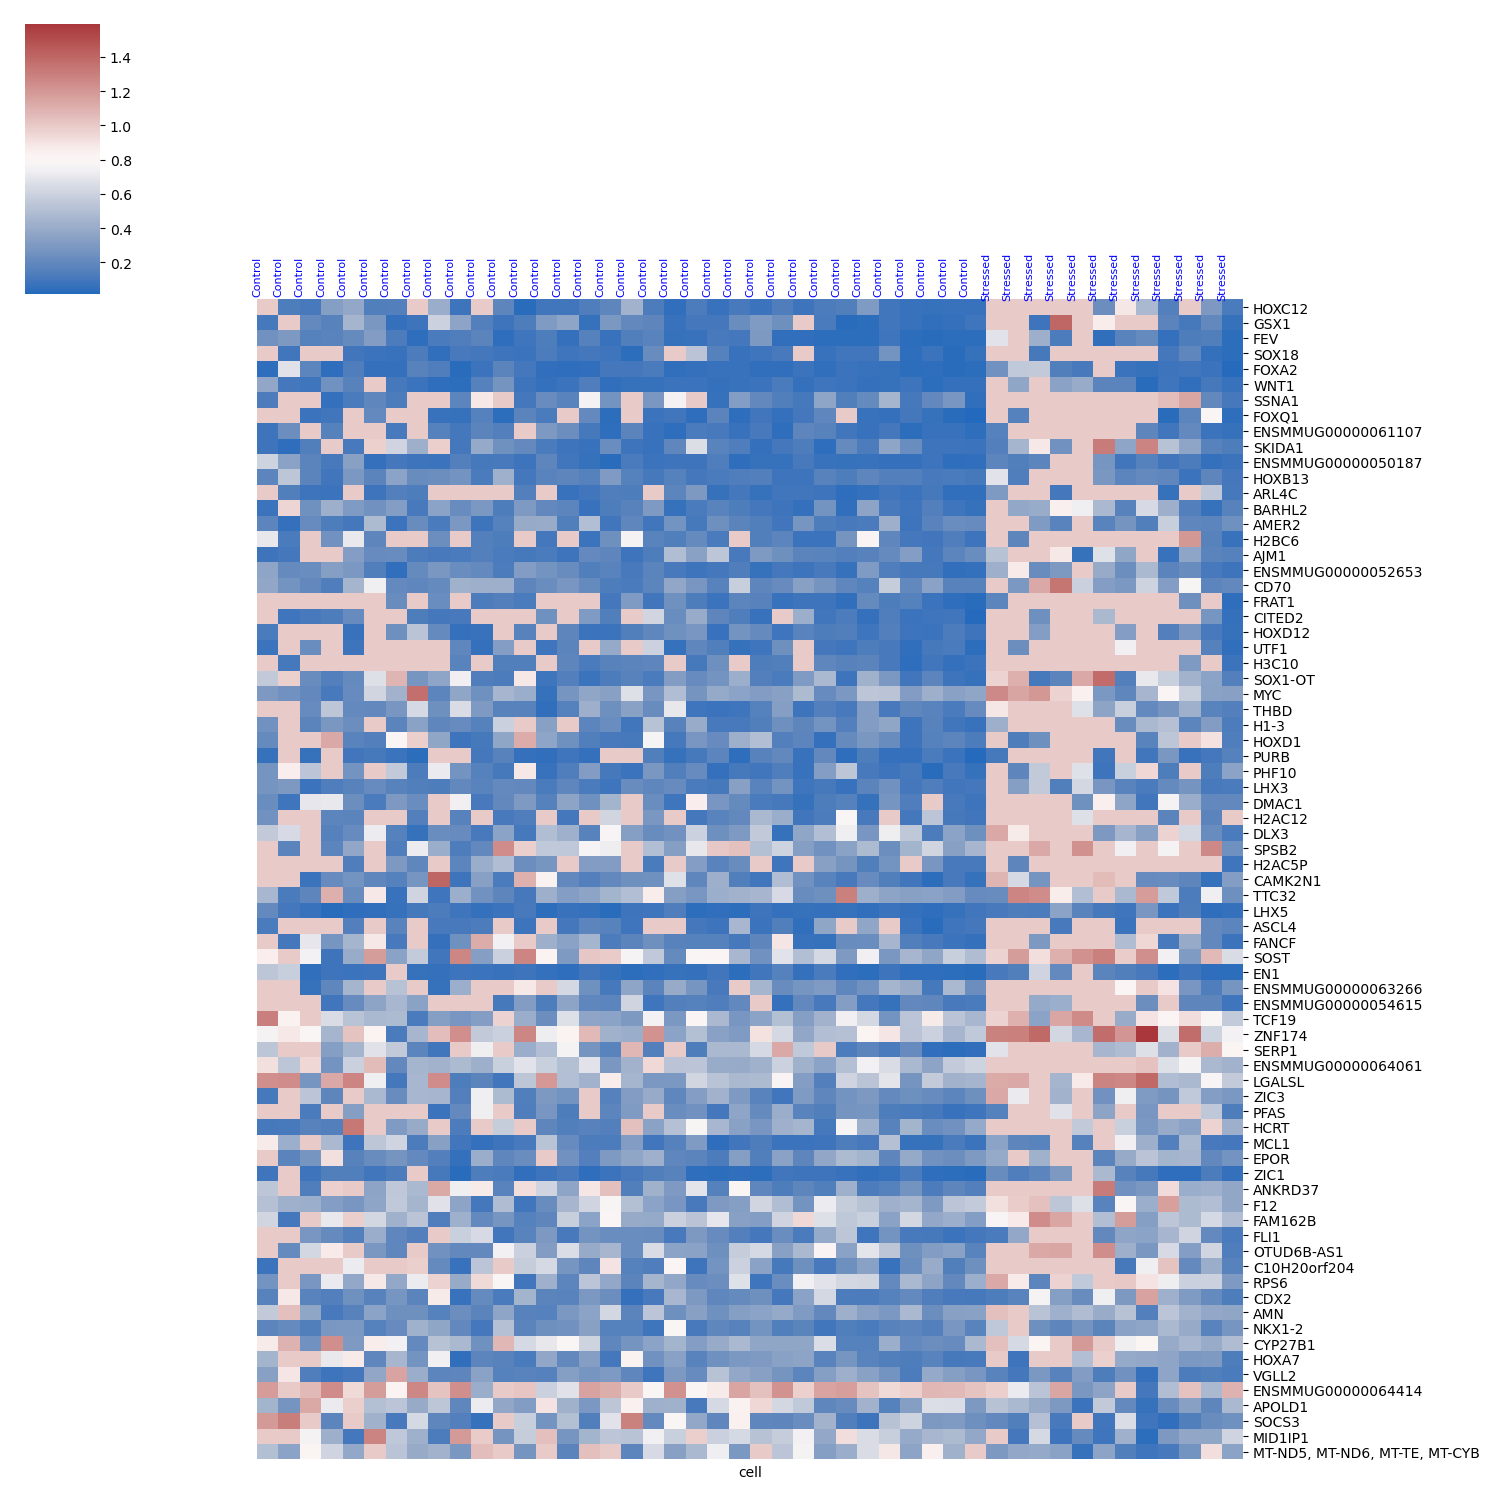

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract the cluster (L1) and group names for labeling
cluster_labels = metadata_sorted['L1'].values
group_labels = metadata_sorted['Group'].values

# Plot the heatmap
g = sns.clustermap(
    gene_data_sorted,
    row_cluster=False,  # Do not cluster genes
    col_cluster=False,  # Columns already organized
    cmap='vlag',  # Colormap for the heatmap
    xticklabels=False,  # Hide x-axis labels to emphasize metadata
    yticklabels=True,  # Show y-axis labels for genes
    figsize=(15, 15)  # Adjust figure size as needed
)

# Add the cluster and group labels on top of the heatmap
for label in range(g.data2d.shape[1]):
       g.ax_heatmap.text(label, -1.5, group_labels[label], 
                      ha='center', va='center', rotation=90, fontsize=8, color='blue')

# Adjust layout to make room for the labels
g.ax_heatmap.set_xticks([])  # Hide the default x-axis ticks
g.ax_heatmap.set_xticklabels([])  # Hide the default x-axis labels
# Save the figure before displaying it
#plt.savefig('c0_cpg_Topmarkers_heatmap_steCont.png', dpi=300, bbox_inches='tight')
plt.show()


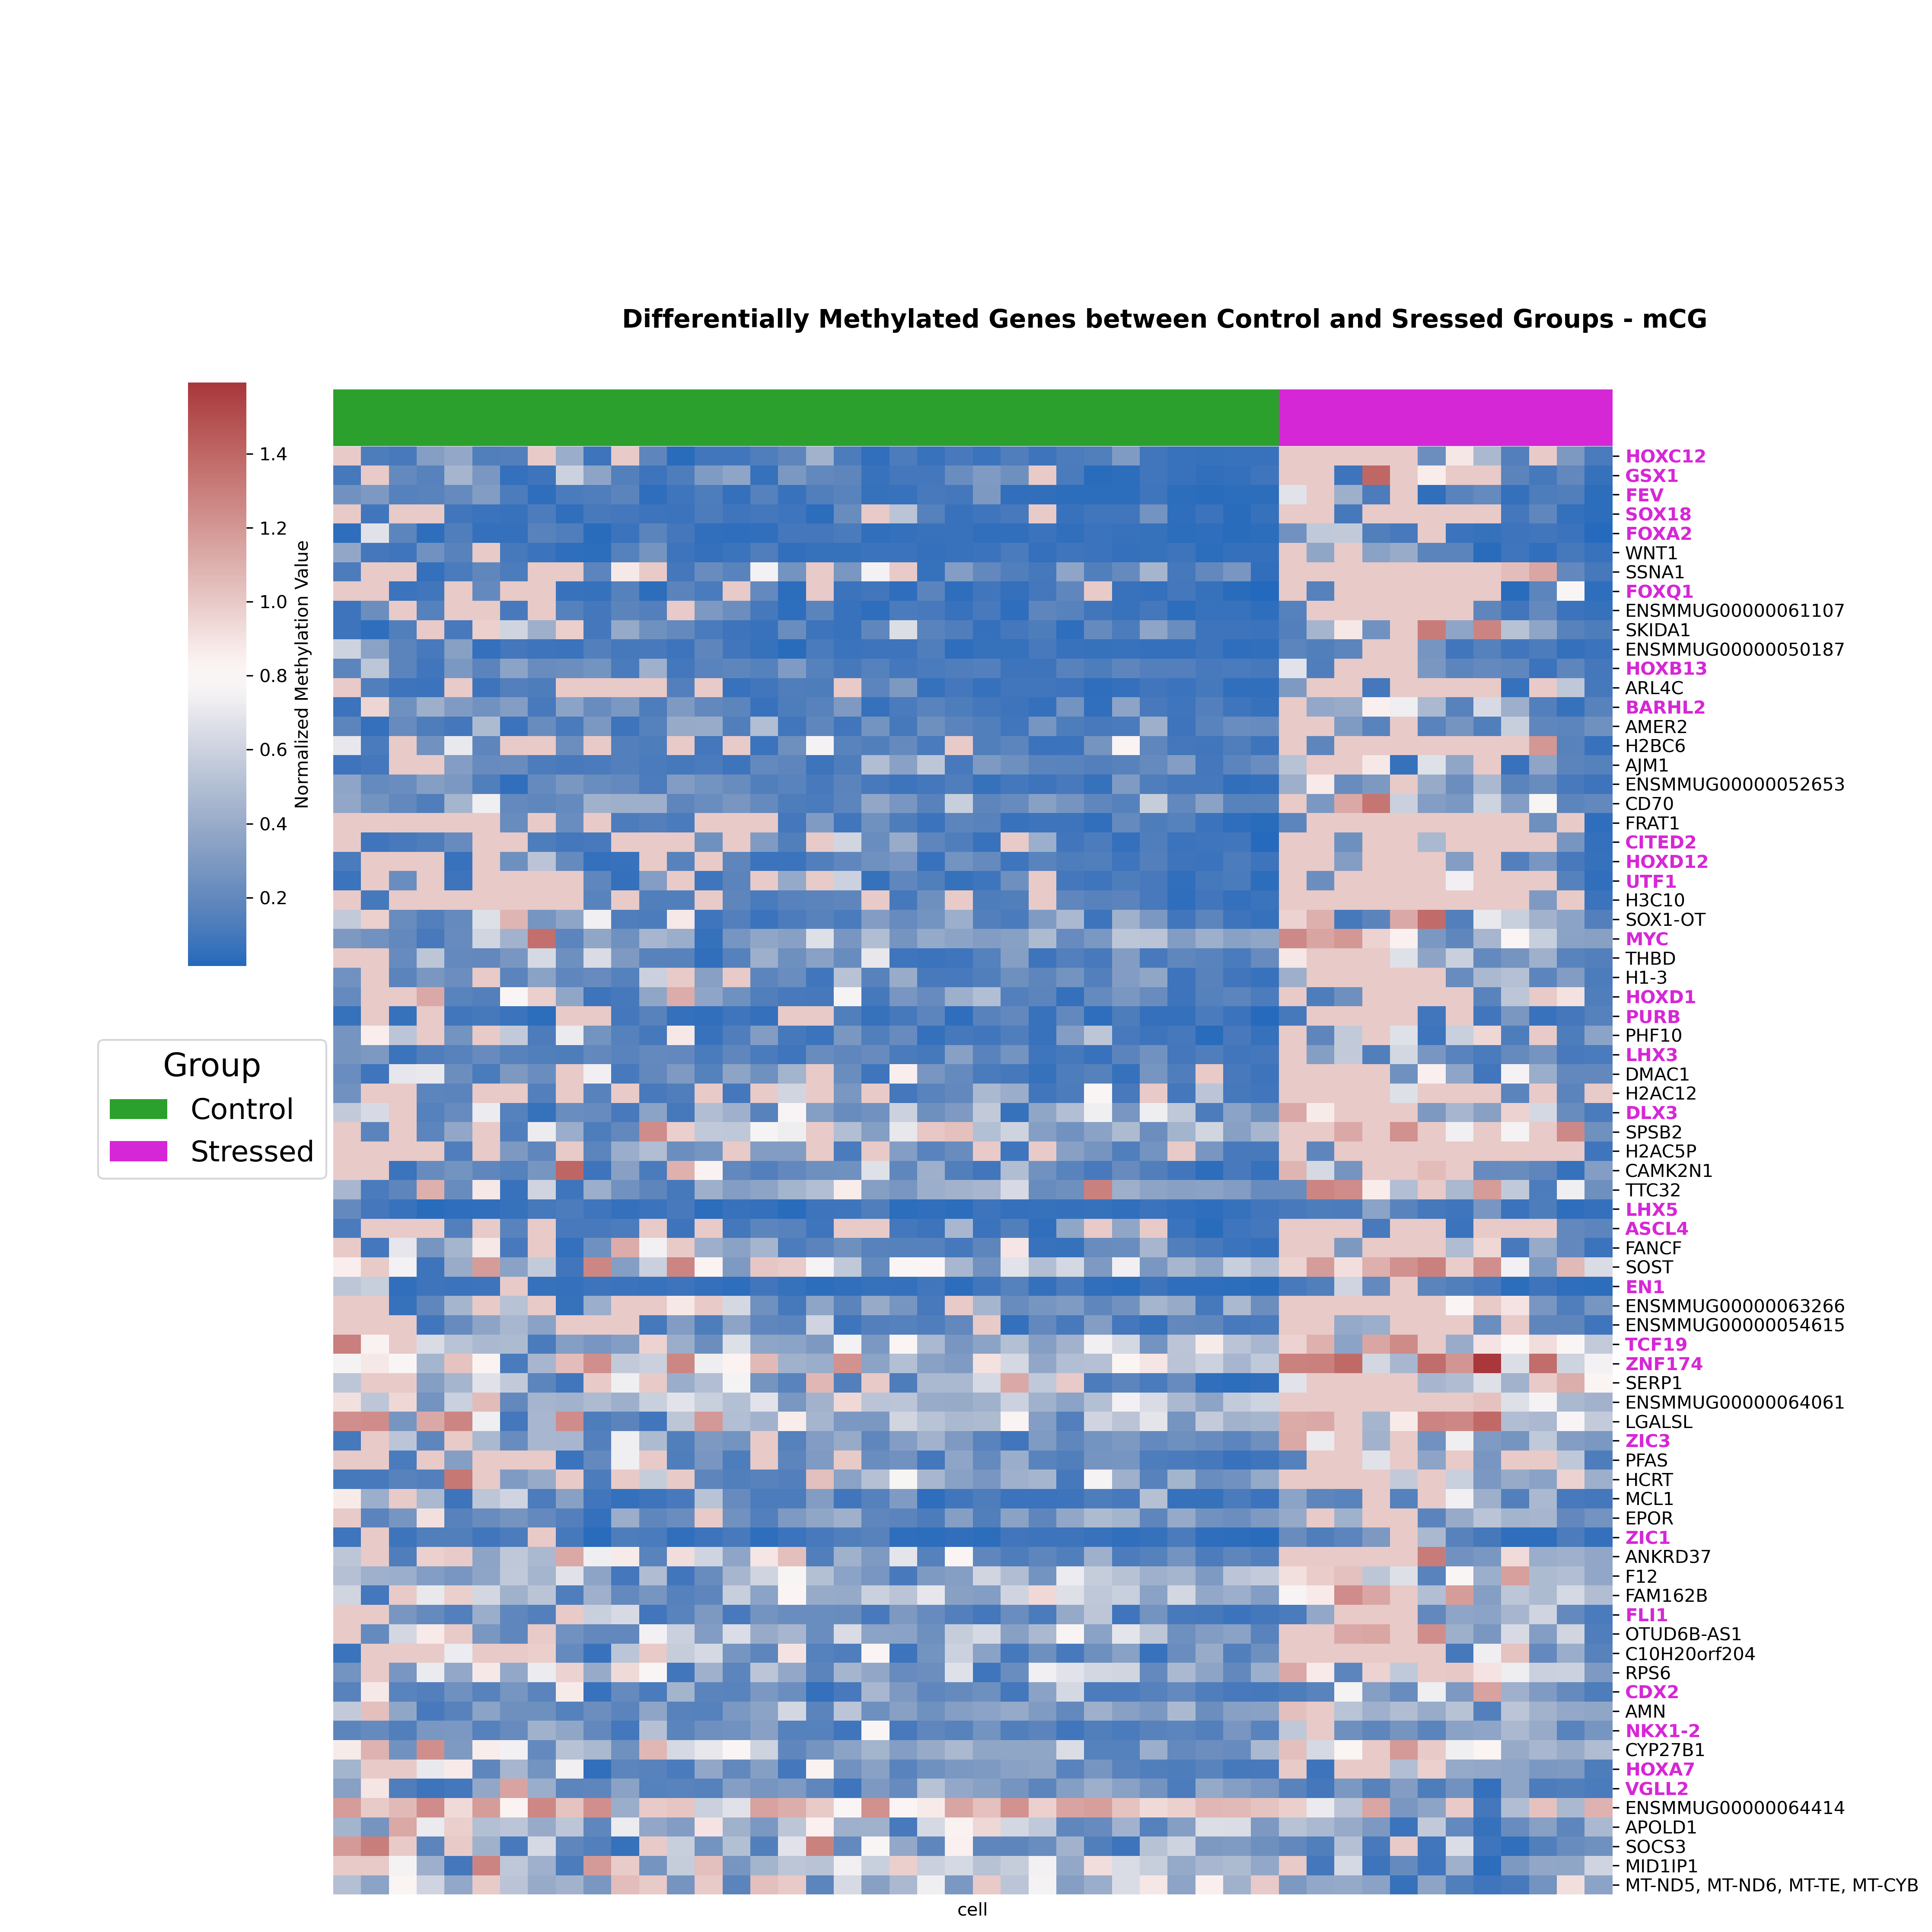

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors
# ----------------------------------------------------------------------------
# 1) Example group mapping for "Stressed" and "Control"
# ----------------------------------------------------------------------------
group_colors_map = {
    "Control": '#2ca02c',
    "Stressed": '#d627d6'
}

# Create col_colors in the order of columns in gene_data_sorted
col_colors = [group_colors_map[g] for g in metadata_sorted['Group']]

# ----------------------------------------------------------------------------
# 2) clustermap with custom colorbar position
# ----------------------------------------------------------------------------
g = sns.clustermap(
    gene_data_sorted,
    row_cluster=False,
    col_cluster=False,
    cmap='vlag',
    xticklabels=False,
    yticklabels=True,
    figsize=(15, 15),
    col_colors=col_colors,
    # Move colorbar to the left side: (x, y, width, height)
    cbar_pos=(0.1, 0.5, 0.03, 0.3),
    cbar_kws={"label": "Normalized Methylation Value"}  # Label the color scale
)

# ----------------------------------------------------------------------------
# 3) Highlight TF genes in red + bold
# ----------------------------------------------------------------------------
tf_list = [
    'BARHL2', 'FOXA2', 'SOX18', 'HOXC12', 'ASCL4', 'LHX5', 'EN1', 'HOXD12',
    'HOXD1', 'FEV', 'LHX3', 'DLX3', 'HOXB13', 'GSX1', 'CDX2', 'ZIC1', 'ZNF174',
    'PURB', 'HOXA7', 'VGLL2', 'CITED2', 'TCF19', 'FOXQ1', 'MYC', 'NKX1-2',
    'FLI1', 'UTF1', 'ZIC3'
]
for label in g.ax_heatmap.get_yticklabels():
    gene_name = label.get_text()
    if gene_name in tf_list:
        label.set_weight('bold')
        label.set_color('#d627d6')

# ----------------------------------------------------------------------------
# 4) Label the top color bar with "Group"
# ----------------------------------------------------------------------------
g.ax_col_dendrogram.text(
    0.65, 0.15,                 # X, Y position in fraction of that axes
    "Differentially Methylated Genes between Control and Sressed Groups - mCG",
    ha='center', va='bottom',
    transform=g.ax_col_dendrogram.transAxes,
    fontsize=14, fontweight='bold'
)

# ----------------------------------------------------------------------------
# 5) Add legend for groups on the right, higher up
# ----------------------------------------------------------------------------
legend_patches = [
    Patch(facecolor=color, label=grp) 
    for grp, color in group_colors_map.items()
]

# Move the legend to the right side, but a bit higher so it doesn’t overlap
# Bigger legend title & text
g.ax_heatmap.legend(
    handles=legend_patches,
    title="Group",
    title_fontsize=18,   # <- bigger legend title
    fontsize=16,         # <- bigger labels
    bbox_to_anchor=(-0.195, 0.6),  # (x, y) move legend above-right
    loc="upper left"
)

# If the legend still overlaps, you can add:
# plt.subplots_adjust(right=0.8)  # Give extra space on the right

#plt.savefig('heatmap_cpg_publevel_figure2.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.savefig('panelA_fig2.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.show()


In [30]:
import matplotlib
print(matplotlib.colors.cnames)


{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'